# YOLO  

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.datasets import *
from fastai.vision import *
from fastai import *

In [3]:
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import json

In [4]:
ROOT_PATH=Path('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/')
DATA_PATH=Path(ROOT_PATH/'data')
VOC_DEVKIT_PATH = Path(DATA_PATH/'VOCdevkit')
MODEL_PATH=Path(ROOT_PATH/'model')
TRAIN_PATH=Path(ROOT_PATH/'train')               

In [5]:
VOC_DEVKIT_PATH.ls()



[PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/pascal_val2007.json'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/.ipynb_checkpoints'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/pascal_train2007.json')]

In [6]:
train_json_path = Path(VOC_DEVKIT_PATH/'pascal_train2007.json')
with open(train_json_path, 'r') as f:
    train_json = json.loads(f.read())

In [7]:
IMAGES, ANNOTATIONS, CATEGORIES = ['images', 'annotations', 'categories']

In [8]:
train_json[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [9]:
train_json[ANNOTATIONS][:3]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0},
 {'segmentation': [[89, 77, 89, 336, 403, 336, 403, 77]],
  'area': 81326,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [89, 77, 314, 259],
  'category_id': 13,
  'id': 3,
  'ignore': 0}]

In [10]:
train_json[CATEGORIES][:5]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'},
 {'supercategory': 'none', 'id': 5, 'name': 'bottle'}]

### Create dict from id to category (dict[id] -> category)

In [11]:
categories = dict([(c['id'], c['name']) for c in train_json[CATEGORIES]]); categories

{1: 'aeroplane',
 2: 'bicycle',
 3: 'bird',
 4: 'boat',
 5: 'bottle',
 6: 'bus',
 7: 'car',
 8: 'cat',
 9: 'chair',
 10: 'cow',
 11: 'diningtable',
 12: 'dog',
 13: 'horse',
 14: 'motorbike',
 15: 'person',
 16: 'pottedplant',
 17: 'sheep',
 18: 'sofa',
 19: 'train',
 20: 'tvmonitor'}

### Create map of id to image file (dict[id] -> filename)

In [12]:
images = dict([(i['id'], i['file_name']) for i in train_json['images']]); images

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

### List of image ids

In [13]:
image_ids = [i['id'] for i in train_json['images']]; image_ids

[12,
 17,
 23,
 26,
 32,
 33,
 34,
 35,
 36,
 42,
 44,
 47,
 48,
 61,
 64,
 66,
 73,
 77,
 78,
 83,
 89,
 91,
 104,
 112,
 122,
 129,
 133,
 134,
 138,
 140,
 141,
 147,
 153,
 154,
 159,
 161,
 162,
 163,
 164,
 171,
 173,
 174,
 187,
 189,
 192,
 193,
 194,
 198,
 200,
 207,
 209,
 219,
 220,
 222,
 225,
 228,
 235,
 242,
 250,
 256,
 259,
 262,
 263,
 276,
 278,
 282,
 288,
 294,
 296,
 306,
 307,
 311,
 312,
 317,
 320,
 325,
 331,
 334,
 337,
 344,
 347,
 349,
 355,
 359,
 367,
 370,
 372,
 379,
 382,
 387,
 391,
 394,
 395,
 400,
 404,
 406,
 407,
 411,
 416,
 430,
 431,
 438,
 446,
 450,
 454,
 463,
 468,
 469,
 470,
 474,
 476,
 477,
 484,
 489,
 496,
 503,
 508,
 516,
 518,
 519,
 522,
 524,
 525,
 526,
 528,
 535,
 537,
 541,
 544,
 549,
 550,
 552,
 554,
 555,
 559,
 565,
 577,
 583,
 589,
 590,
 592,
 597,
 605,
 609,
 612,
 620,
 622,
 625,
 632,
 633,
 635,
 648,
 654,
 657,
 671,
 672,
 680,
 685,
 688,
 689,
 695,
 699,
 700,
 709,
 710,
 711,
 726,
 729,
 731,
 733,
 7

In [14]:
JPEGS_PATH = Path(VOC_DEVKIT_PATH/'VOC2007'/'JPEGImages')
IMAGES_PATH = JPEGS_PATH
JPEGS_PATH.ls()[:5]

[PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/001618.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/005169.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/002201.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/006238.jpg'),
 PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages/005960.jpg')]

In [15]:
train_json[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

### Create a dict with image_id to bounding box and category dict[image_id] -> (bbox, category)

1. The goal here is to create a dictionary that maps an `image_id` to the `bbox` and `category`
2. This requires a few additional helper methods described below 

<br>

### Helper methods
<br>




#### Changing BBOX representation format
1. The information in the `annotations` dictionary has an attribute called `bbox` which is represented in a notation usually used in ML, which is width by height whereas most libraries and math representation is width by height 

<br>

#### TLDR;
 - Math world - rows by columns (height by width)
 - Computer Vision  - columns by rows (width by height)



In [16]:

def create_train_annotations(train_json:dict):
    """
    1. creates an annotations dictionary 
    2. converts the format in which height and width is stored in the 
    annotations dictionary of the train_json dict.
    3. Also converts the height and width information to top left x, y cordinate and bottom right x, y coordinate
    Hence the subtraction information
    """
    annotations = collections.defaultdict(lambda:[])
    for o in train_json[ANNOTATIONS]:
        bbox = o['bbox']
        bb = np.array([bbox[1], bbox[0], bbox[3]+bbox[1], bbox[2]+bbox[0]])
        annotations[o['image_id']].append((bb, o['category_id']))
    return annotations

def get_category(category_id): 
    cat = categories.get(category_id, None)
    if not cat: 
        cat = val_categories.get(category_id, None)
    return cat

def get_image_filename(image_id): 
    filename = images.get(image_id, None)
    if not filename:
        filename = val_images.get(image_id, None)
    return filename
        
def _get_annotations(image_id): 
    annot =  annotations.get(image_id, None)
    if not annot:
        annot = val_annotations.get(image_id, None)
    return annot


def convert_bb_to_height_and_width(bbox):
    """
    Does the opposite. 
    1. Converts bbox x, y coordinates for top left and bottom right to height and width information
    """
    bb = bbox
    return np.array([bb[1], bb[0], bb[3]-bb[1], bb[2]-bb[0]])

def _open_image(filename):
    """
    1. opens an image with just the filename using the standard `open_image` method
    """
    return open_image(JPEGS_PATH/filename)

def _display_with_bbox(img_filename, bbox:list=None):
    """
    1. Creates bounding boxes using FastAIs ImageBBox api
    """
    if isinstance(img_filename, str):
        img = _open_image(img_filename)
    else:
        img = img_filename
        
    if not isinstance(bbox, ImageBBox):        
        bb, category = bbox    
        category_name = category if isinstance(category, list) else get_category(category)
        img_bbox = ImageBBox.create(*img.size, bb, labels=[0], classes=list(category_name))        
    else:
        img_bbox = bbox
    img.show(y=img_bbox, figsize=(5, 5))
    
def _get_largest_img_bbox(img_annotation):
    if not img_annotation: raise Exception
    sorted_bbox = sorted(img_annotation, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return sorted_bbox[0]

In [17]:
annotations = create_train_annotations(train_json)

In [18]:
get_category(7), get_image_filename(12)

('car', '000012.jpg')

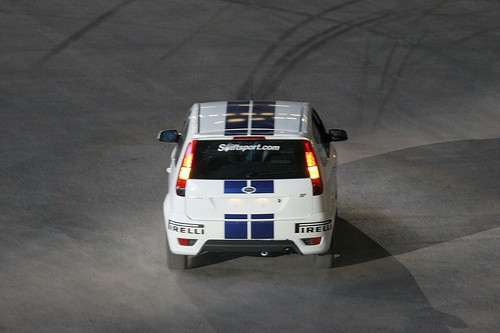

In [19]:
first_img = list(images.values())[0]
_open_image(first_img)

### Creating images with bounding boxes using ImageBBox

```python
img = open_image('imgs/car_bbox.jpg')
bbox = ImageBBox.create(*img.size, [[96, 155, 270, 351]], labels=[0], classes=['car'])
img.show(y=bbox)
```

In [20]:
imgs, lbl_bbox = get_annotations(VOC_DEVKIT_PATH/'pascal_train2007.json')
imgs_valid, lbl_bbox_valid = get_annotations(VOC_DEVKIT_PATH/'pascal_val2007.json')

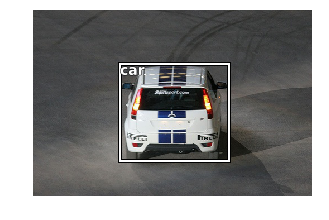

In [21]:
imgs[0], lbl_bbox[0]

_display_with_bbox(imgs[0], lbl_bbox[0])

In [22]:
annotations[12]


[(array([ 96, 155, 270, 351]), 7)]

In [23]:
bb, cat = annotations[12][0]; bb, [get_category(cat)]

(array([ 96, 155, 270, 351]), ['car'])

In [24]:
img = _open_image(imgs[0]); img.size, lbl_bbox[0]

(torch.Size([333, 500]), [[[96, 155, 270, 351]], ['car']])

### Sort each image annotation to return the largest image

The annotations for image_id 23 looks like this 

```python
(23,
 [(array([229,   8, 500, 245]), 2),
  (array([219, 229, 500, 334]), 2),
  (array([177,   1, 500,  90]), 2),
  (array([  0,   1, 369, 117]), 15),
  (array([  1,   2, 462, 243]), 15),
  (array([  0, 224, 486, 334]), 15)])
```

 - The function returns the largest image by calling the `_get_largest_img_bbox` on a list comprehension

 - internally the method calls sort and computes the area rows x columns (height x width) and returns the largest area
 
 ```python
x[0] # where x is the example tupule above containing only the arrays
x[0][-2:] # last 2 indexes of the array
x[0][:2] # first 2 indexes of the array
np.product(x[0][-2:]-x[0][:2])
```

Then sort it in reverse order and return the highest


In [25]:
largest_annotations = {img_id: _get_largest_img_bbox(a) for img_id, a in annotations.items()}

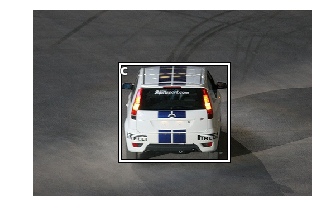

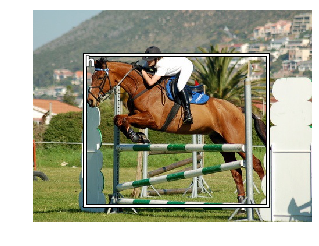

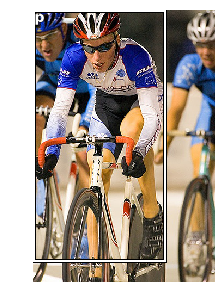

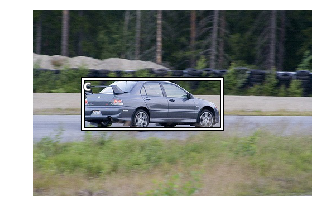

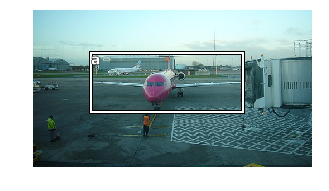

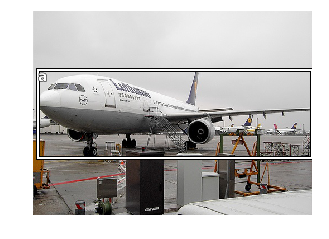

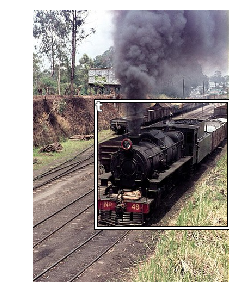

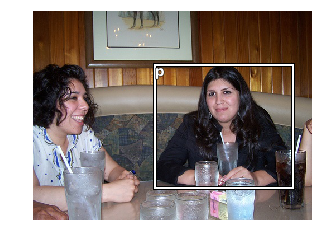

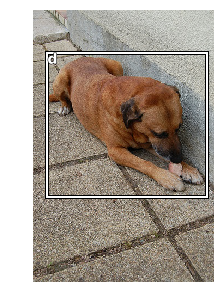

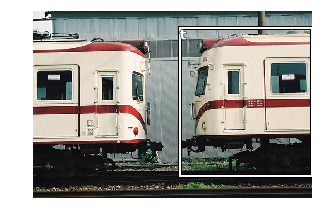

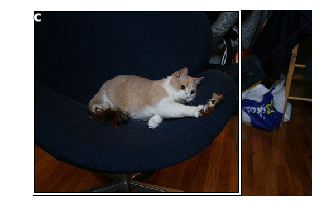

In [26]:
i = 0
for img_id, annots in largest_annotations.items():
    img_filename = get_image_filename(img_id)    
    annots = (np.expand_dims(annots[0], 0), annots[1])
    _display_with_bbox(img_filename, annots)
    i+=1
    if i>10: break

### Create a CSV of all the largest images in each file

In [27]:
df = pd.DataFrame({'filename':[get_image_filename(img_id) for img_id, annots in largest_annotations.items()],
              'cat': [get_category(annots[1]) for _, annots in largest_annotations.items()]})

df.head()

filename        cat
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

In [28]:
CSV_PATH = Path(DATA_PATH/'csv')

CSV_PATH.mkdir(exist_ok=True)

In [29]:
df.to_csv(Path(DATA_PATH/'csv'/'largest_images.csv'))

In [30]:
df = pd.read_csv(DATA_PATH/'csv'/'largest_images.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

filename        cat
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

In [31]:
csv_path = Path(DATA_PATH/'csv'/'largest_images.csv')
csv_path = csv_path.__str__()
csv_path

'/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/csv/largest_images.csv'

In [32]:
JPEGS_PATH

PosixPath('/home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages')

### Create a NN which does classification and regression.

### Using fastai v1 features

- Use the `get_annotations` method to get the imgs, and bounding boxes
- create a dictionary for both datasets `train` and `valid`
- create a `get_y_func` that returns the bboxes and classes for a given image name (filename)

```python
imgs, lbl_bbox = get_annotations(VOC_DEVKIT_PATH/'pascal_train2007.json')
imgs_valid, lbl_bbox_valid = get_annotations(VOC_DEVKIT_PATH/'pascal_val2007.json')

img2bbox = dict(zip(imgs, lbl_bbox))
img2bbox_v = dict(zip(imgs_valid, lbl_bbox_valid))

def get_y_func(x):
    if x.name in img2bbox:
        bboxes, classes = img2bbox[x.name]
    else:
        bboxes, classes = img2bbox_v[x.name]
    return [bboxes, classes]

get_y_func(Path(JPEGS_PATH/'000012.jpg'))
```

### Validation Dataset

In [33]:
val_json_path = Path(VOC_DEVKIT_PATH/'pascal_val2007.json')
with open(val_json_path, 'r') as f:
    val_json = json.loads(f.read())    
val_json.keys()



dict_keys(['images', 'type', 'annotations', 'categories'])

In [34]:
val_categories  = dict([(c['id'], c['name']) for c in val_json[CATEGORIES]])
val_images      = dict([(i['id'], i['file_name']) for i in val_json['images']]); 
val_image_ids   = [i['id'] for i in val_json['images']]; 
val_annotations = create_train_annotations(val_json); 

In [35]:
val_largest_annotations = {img_id: _get_largest_img_bbox(a) for img_id, a in val_annotations.items()}


### Create a similar largest images img2bbox dict
 - Create on for training set and one for the validation set

In [36]:
img2bbox_largest_imgs =  {get_image_filename(img_id): ( np.expand_dims(annots[0], 0), 
                                   [get_category(annots[1])] ) for img_id, annots in largest_annotations.items() }




In [37]:
img2bbox_val_largest_imgs =  {get_image_filename(img_id): ( np.expand_dims(annots[0], 0), 
                                   [get_category(annots[1])] ) for img_id, annots in val_largest_annotations.items() }




### Create a get_y_func function 

The return statement of the `get_y_func_largest(o)` method uses a `tolist` call on the bboxes coordinates which is a numpy array.

However, ImageCategoryList expects a python list and would cause it to break. So the explict call `tolist()` is necessary.

In [38]:
def get_y_func_largest(o): 
    bbox_classes = img2bbox_largest_imgs.get(o.name, None)
    if not bbox_classes:
        bbox_classes = img2bbox_val_largest_imgs.get(o.name, None)
        
    bboxes, classes = bbox_classes    
    return [bboxes.tolist(), classes]
    
    
get_y_func_largest(Path(JPEGS_PATH/'000012.jpg'))

[[[96, 155, 270, 351]], ['car']]

In [39]:
vimages = img2bbox_val_largest_imgs.keys(); list(vimages)[:5]


['000005.jpg', '000007.jpg', '000009.jpg', '000016.jpg', '000019.jpg']

### Radek's approach 
1. Need to figure out how this works with `learner.show_results()`

In [40]:
# [( ll.data.classes[torch.argmax(c).item()], torch.argmax(c) ) for c in cat ]

class StubbedObjectCategoryList(ObjectCategoryList):    
    def analyze_pred(self, pred): 
        print(f'Analyze Preds - {pred}')
        coords, cat = preds[:, :4], preds[:, 4:]
        cats = [torch.argmax(c) for c in cat]       
        return [coords.unsqueeze(0), cats]
    
    


In [41]:
data = ObjectItemList.from_folder(JPEGS_PATH)
data = data.split_by_files(list(vimages))
data = data.label_from_func(get_y_func_largest, label_cls=StubbedObjectCategoryList) 
data = data.transform(get_transforms(max_zoom=1, max_warp=0.05, max_rotate=0.05, max_lighting=0.2), 
                      tfm_y=True, size=224, resize_method=ResizeMethod.SQUISH)
data = data.databunch(bs=16, collate_fn=bb_pad_collate)
data = data.normalize(imagenet_stats)

In [42]:
data

ImageDataBunch;

Train: LabelList (2501 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: StubbedObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages;

Valid: LabelList (2510 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: StubbedObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/ec2-user/SageMaker/SingleShot_ObjectDetection/data/VOCdevkit/VOC2007/JPEGImages;

Test: None

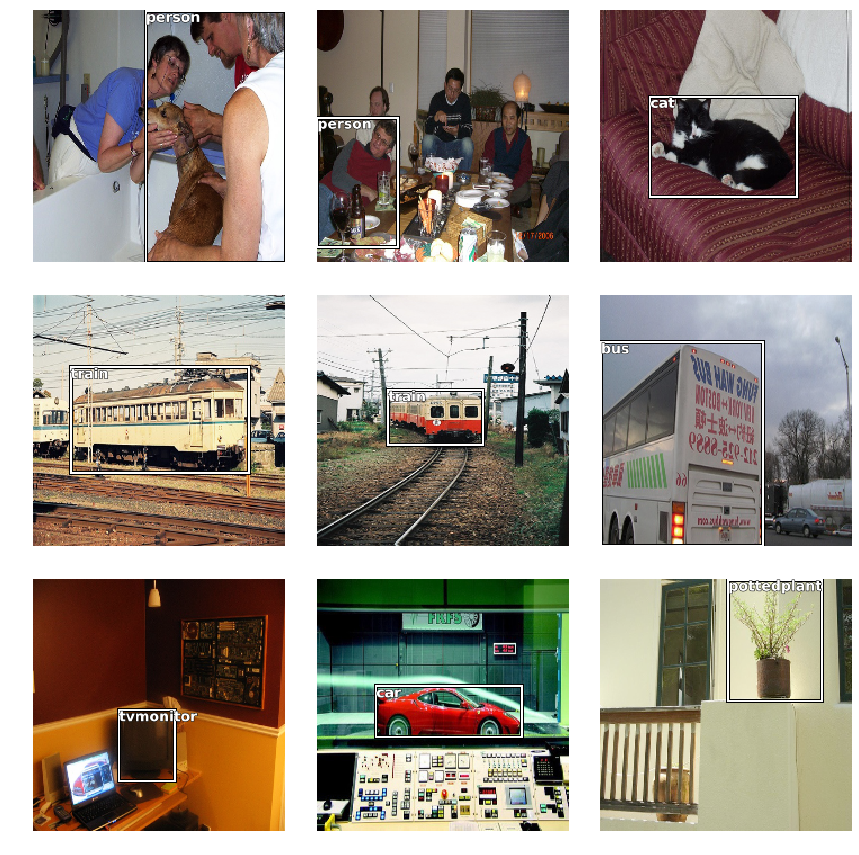

In [43]:
data.show_batch(rows=3)

In [44]:
data.train_ds.y[0].labels, data.train_ds.y[0].data

(array([Category cat], dtype=object),
 (tensor([[-0.2400, -0.1467,  0.0080,  0.0667]]), array([8])))

In [45]:
data.c

21

### Last layers of the model to perform the regression

1. Here we build our own last layer on top of resnet
2. The last layer returns `4+data.c` values which is the first 4 values for the bounding box and 21 values for the classification problem

In [46]:
head_reg4 = nn.Sequential(
    Flatten(), 
    nn.ReLU(),
    nn.Dropout(0.5),    
    nn.Linear(25088, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256, 4+data.c)
)




### Loss function

1. The loss function now is the combined loss function for classification and regression together.
2. The `detn_classification_loss` computes the `F.cross_entropy` loss for image classification
3. The `detn_l1_loss` computes the `nn.L1Loss()` for the bounding box regression
4. The losses are added together with a multiple `20` so that the scales match. It's obtained from trial and error
5. For the bounding boxes we know the input is going to be between 0 and 224 so the sigmoid forces it between 0 and 1 and multiplying it by 224 it brings it with our required range.

In [47]:
def detn_loss(input, target, targ_cls):    
    bbox_targ = target
    bbox_inp, cat_inp = input[:, :4], input[:, 4:]    
    bbox_inp = bbox_inp[:, None]    
#   print(f' bbox_inp {bbox_inp}, bbox_targ {bbox_targ}')
    bbox_inp = torch.sigmoid(bbox_inp) * 224
    bbox_targ = torch.sigmoid(bbox_targ) * 224
#   print(f' bbox_inp2 {bbox_inp}, bbox_targ2 {bbox_targ}')
    return F.l1_loss(bbox_inp, bbox_targ) + F.cross_entropy(cat_inp, targ_cls.flatten())* 20


def detn_l1(input, target, _targ_cls):    
    bbox_targ = target
    bbox_inp = input[:, :4]
    bbox_inp = bbox_inp[:, None]
    bbox_inp = torch.sigmoid(bbox_inp) * 224
    bbox_targ = torch.sigmoid(bbox_targ) * 224
    return F.l1_loss(bbox_inp, bbox_targ).data

def detn_acc(input, _target, targ_cls):        
    cat_inp = input[:, 4:]
    return accuracy(cat_inp, targ_cls.flatten())

# Radek's loss function
# def loss_fn(preds, targs, class_idxs):
#     return nn.L1Loss()(preds, targs.squeeze())


In [48]:
ll = None
ll = cnn_learner(data, models.resnet34, custom_head=head_reg4, loss_func=detn_loss, metrics=[detn_acc, detn_l1])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 1.45E-02


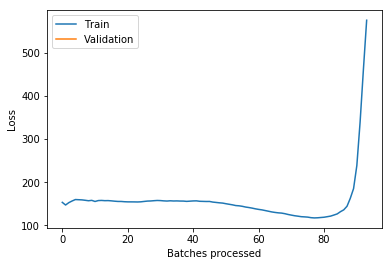

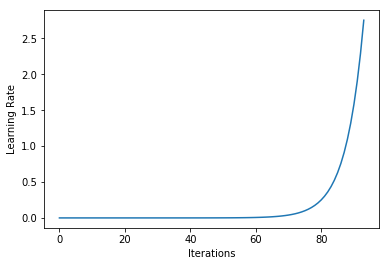

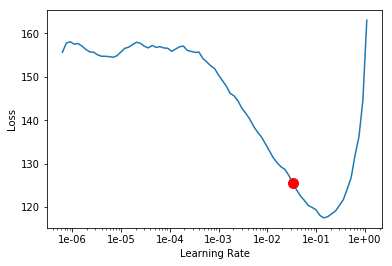

In [49]:
def learning_rate_plots(learner):
    learner.lr_find()
    learner.recorder.plot_losses()
    learner.recorder.plot_lr()
    learner.recorder.plot(suggestion=True)
    
learning_rate_plots(ll)

In [50]:
ll.fit_one_cycle(5, slice(1e-2))

In [51]:
def save_model(learner):
    return learner.save(Path(MODEL_PATH/'ssd_model'))

def save_learner(learner):
    return learner.export(Path(MODEL_PATH/'ssd_learner'))

def save(ll):
    return (save_model(ll), save_learner(ll))

In [52]:
save(ll)


(None, None)

In [53]:
ll.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.58E-07


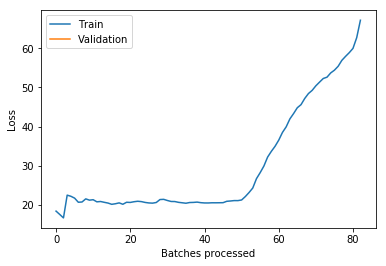

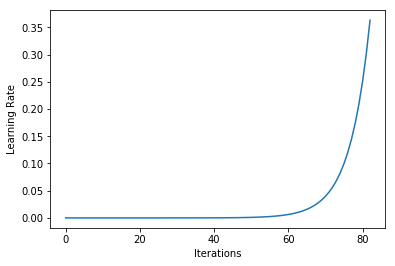

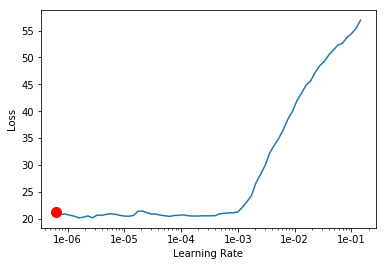

In [54]:
learning_rate_plots(ll)

Min numerical gradient: 2.51E-05
Min loss divided by 10: 1.58E-07


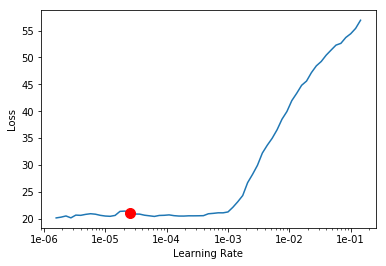

In [55]:
ll.recorder.plot(suggestion=True, skip_start=15)

In [56]:
ll.fit_one_cycle(2, slice(3e-5))

In [57]:
ll.freeze()

In [58]:
save(ll)

(None, None)

In [59]:
preds = ll.pred_batch(ds_type=DatasetType.Valid)


In [60]:
preds[0]

tensor([-0.3741, -0.7258,  0.5824,  0.7941, -2.4556,  0.1084, -1.6398,  0.1699,
         2.6235, -0.2105,  1.0930, 11.2653, -2.4922, -1.1341, -2.1660,  0.2924,
        -0.8636, -3.2663,  0.0964, -0.1028, -0.4441, -4.2728, -1.8886,  1.0740,
        -2.1983])

In [110]:
def get_preds(ll, preds, idx):
    preds = preds[idx] 
    coords, cat = preds[:4], preds[4:]
    #coords = (coords + 1) * 248
#     coords = (coords + 1.)/2 * 224
    coords = torch.sigmoid(coords * 3) * 224
#   print(coords)
    cat_idx = torch.argmax(cat)
    cat = ll.data.classes[cat_idx]
    return (coords), cat


def display_preds(data, idx, ll, preds):
    one_batch = ll.data.one_batch(ds_type=DatasetType.Valid)
    x, y = one_batch
#     img = data.valid_ds.x[idx]
    img = data.valid_ds.x.reconstruct(x[idx])
    coords, cat = get_preds(ll, preds, idx)    
    bbox = ImageBBox.create(*img.size, [coords.tolist()], labels=[0], classes=[cat])
    img.show(y=bbox, figsize=(8,8))


In [111]:
coords, cat = get_preds(ll, preds, 3); coords, cat

(tensor([ 62.0061,  48.2555, 199.0736, 174.0728]), 'chair')

### Not the best bounding boxes

1. This seems to be off by a bit than expected but seems to be predicting the class and the bounding box reasonably okay

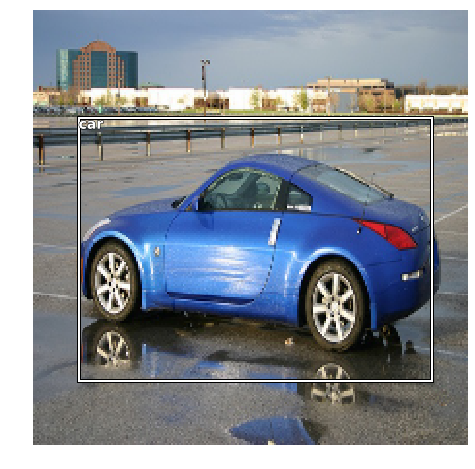

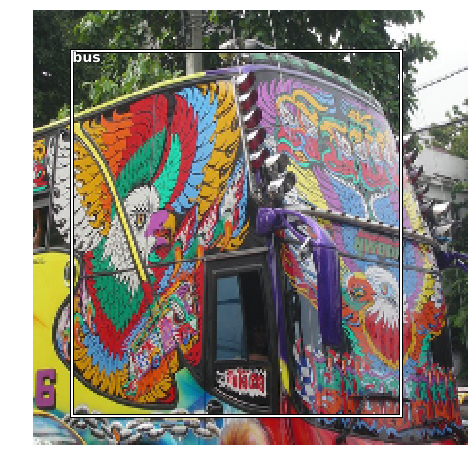

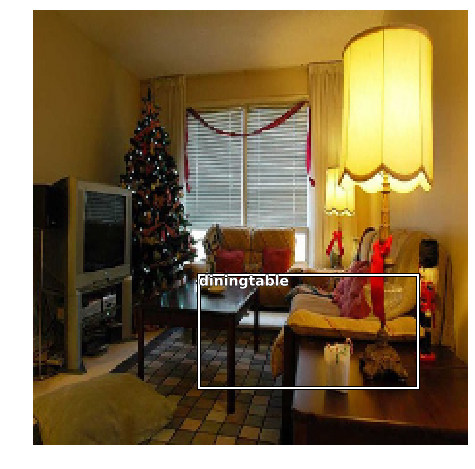

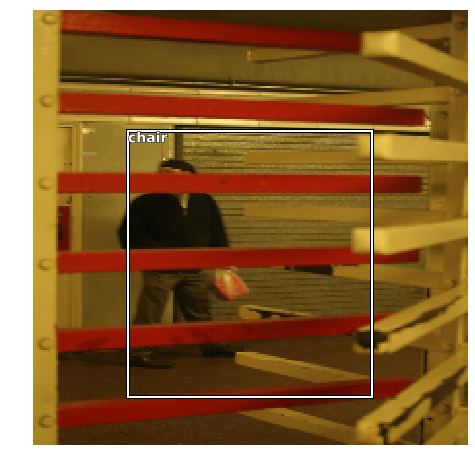

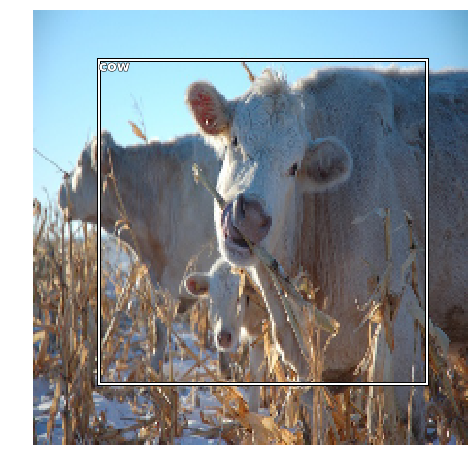

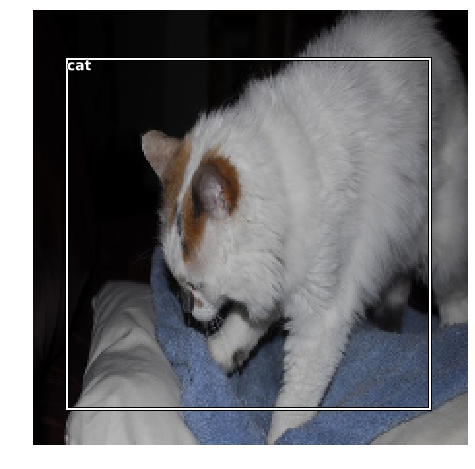

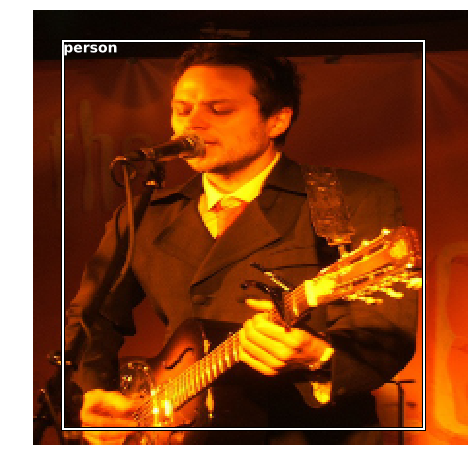

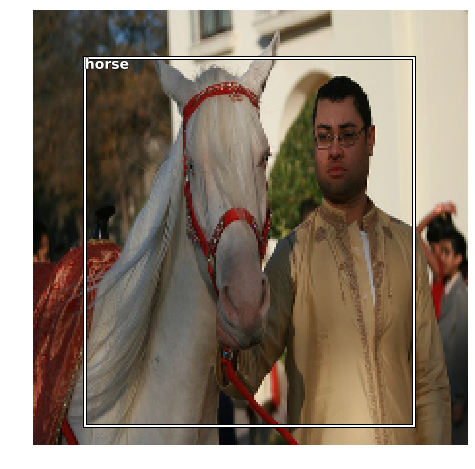

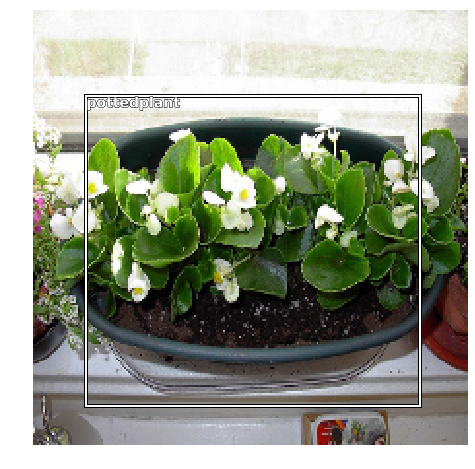

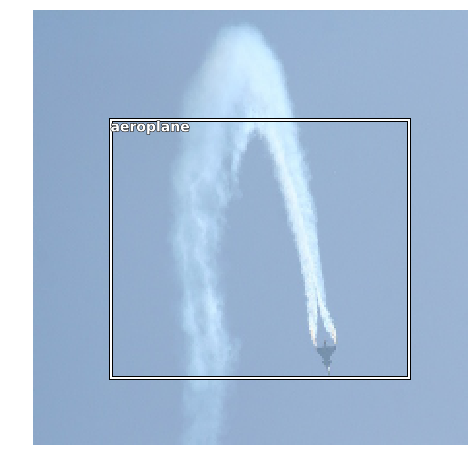

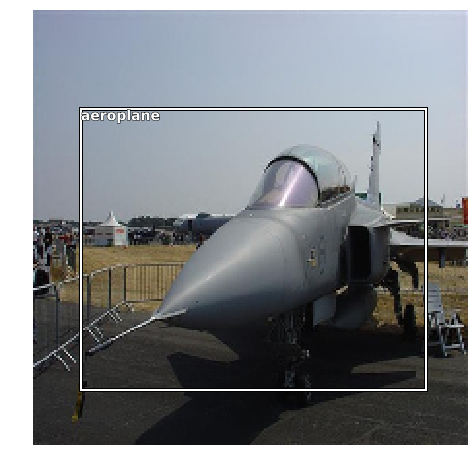

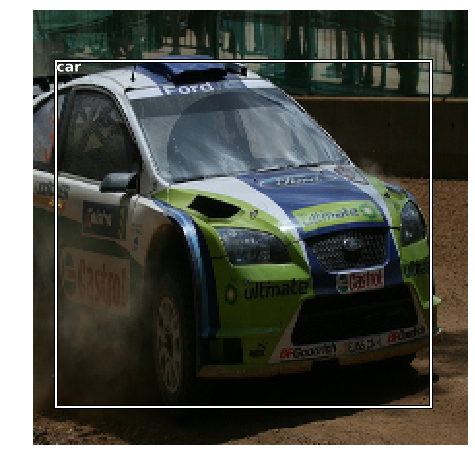

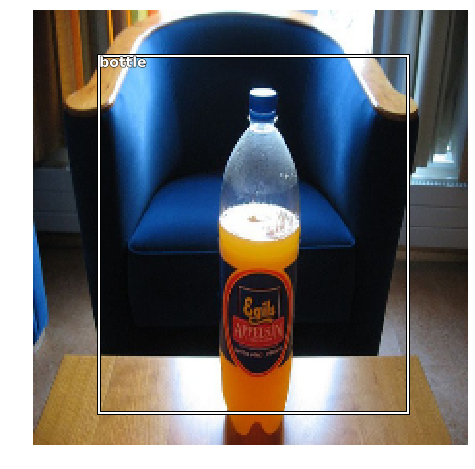

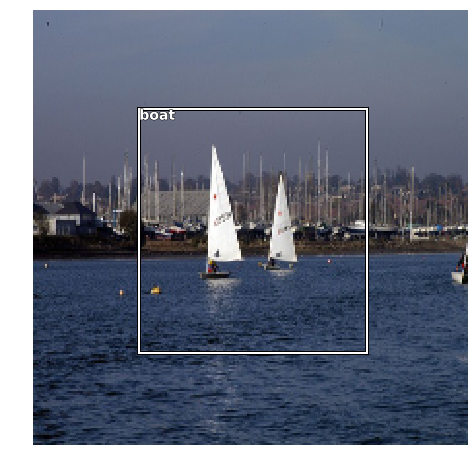

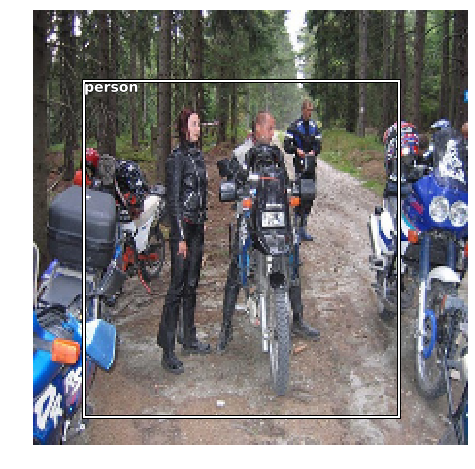

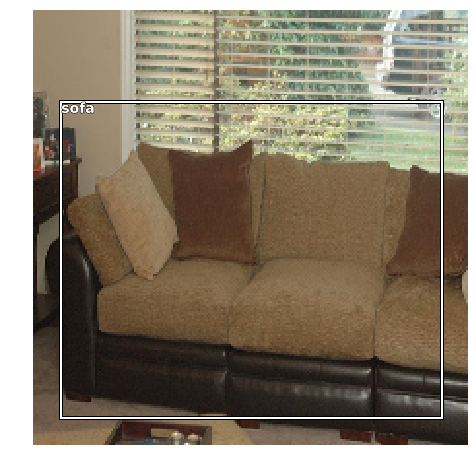

In [112]:
for i, _ in enumerate(preds):
    display_preds(data, i, ll, preds)

### Fin - Can Skip

#### Some random tibdits from Radek's FlukeDetector Notebook

In [483]:
coords, cat = preds[:, :4], preds[:, 4:]
coords[:2], cat[:2]

(tensor([[-0.3989, -0.7566,  0.6548,  0.7396],
         [-0.5936, -0.6976,  0.8938,  0.6963]]),
 tensor([[-2.8378,  1.2836, -0.7165, -1.9183,  2.9272, -1.0188,  0.6322,  9.2873,
          -2.7018, -0.7693, -2.1275, -0.6307, -0.9311, -1.9422,  2.2758,  1.8933,
          -2.2006, -4.1762, -0.2901, -1.1906, -3.2298],
         [-3.3202, -3.1743, -1.1098, -2.2190, -1.0749, -3.1534,  2.0953,  1.3536,
          -1.0329,  1.0083, -1.5490, -3.5728,  0.0425,  0.3873, -1.7954,  3.2375,
          -0.8440, -3.2466,  0.7733,  1.8535,  1.0193]]))

In [93]:

# Working on 2D array 
array = np.arange(12).reshape(3, 4) 
print("INPUT ARRAY : \n", array) 
  
# No axis mentioned, so works on entire array 
print("\nMax element : ", np.argmax(array)) 
  
# returning Indices of the max element 
# as per the indices 
print("\nIndices of Max element : ", np.argmax(array, axis=0)) 
print("\nIndices of Max element : ", np.argmax(array, axis=1)) 

INPUT ARRAY : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Max element :  11

Indices of Max element :  [2 2 2 2]

Indices of Max element :  [3 3 3]


In [105]:
t = tensor([[-2.1163, -0.1529, -4.3530,  0.5818, -3.5088, -0.5682,  1.3556, -0.0075,
         -0.4016, -1.8204, -0.9301, -4.6915, -2.3219,  0.2618, -1.5950, -1.7867,
         -2.7522, -0.4517, -0.9721,  0.8649, -1.0931],
        [-2.3464, -0.9473, -2.5026, -0.4197, -0.5125, -1.4268, -2.8730, -1.8945,
          1.5046,  2.7074,  2.6540,  0.2486,  2.0899,  1.4136, -1.9787, -1.9030,
          0.8942, -0.0477, -1.9182, -2.6095, -1.1108],
        [-0.2549, -0.6058,  3.1297, -3.6288,  0.5057, -1.9515,  2.4702,  1.9680,
         -1.3292,  1.2449, -2.2651, -0.4873,  0.6268,  0.1598, -3.8778,  3.7636,
         -1.1991, -0.6505, -0.0861,  0.5506, -0.4007],
        [ 0.7644, -0.1598, -2.5166,  0.9598,  1.4598,  2.2113, -1.4944, -1.3518,
          1.1358,  1.6619,  0.1288, -1.9740,  2.5980, -1.8787,  0.6560,  0.2229,
          1.9851, -0.8318, -1.0168,  0.7231,  0.2810],
        [ 2.3857,  2.8859,  6.3624,  2.6127, -0.8805, -3.8515,  1.0065,  0.7206,
         -1.1582, -1.4865,  6.1983,  1.5816,  0.4026,  1.6081,  1.1813,  0.6382,
          1.8382, -3.3976,  1.9499, -0.3796,  1.2721],
        [-1.5806,  2.9969,  2.4224,  1.8233, -1.6952, -1.3316, -3.0557,  1.1404,
          0.3920, -0.2095, -3.2165,  2.7279,  1.3599, -0.6942,  0.3327, -0.1622,
          1.3329,  1.8338, -0.8617, -1.4370, -1.2067],
        [-0.7190,  2.8399,  1.7509, -3.6996, -1.4082,  0.2870, -2.6082,  1.2685,
          1.6765,  0.7541, -0.4532, -0.0404,  0.4406,  1.5347,  1.1949,  1.7283,
         -1.8429,  3.0281, -0.5650,  0.7932, -0.5971],
        [ 1.2187,  1.0409,  4.2863,  3.6342, -0.3365,  0.9562,  1.1641, -0.5557,
         -1.4098, -1.8420, -0.1154,  1.5274,  0.5468, -1.1585,  0.5739, -0.4262,
         -0.0162,  0.5581, -2.4665, -1.9642,  0.3878],
        [-2.8416,  2.3072,  3.4315,  5.2539,  0.5007,  0.6449, -3.0669, -0.2132,
          1.2919,  1.3295,  0.2945, -1.4603, -3.5085, -0.3023,  2.1940, -1.1809,
         -2.7685, -2.0042,  4.2876, -2.0003,  2.0714],
        [ 4.3750,  1.7836, -0.5288,  2.0673, -0.1358, -0.3949,  0.0766,  2.1170,
          0.9271, -0.1077, -0.2827, -3.5501, -1.0935,  3.6697, -0.0416, -0.6354,
          2.1121,  0.2654,  0.1754, -0.1907,  0.0239],
        [ 0.8350, -0.8574,  3.7547, -1.4495,  0.9226,  0.5098, -0.6908, -0.6366,
          0.4017,  1.6858, -0.0639,  0.6801, -1.4067, -0.9318,  5.1943, -1.9728,
          0.2539, -4.5285,  1.9681, -0.1656,  0.0324],
        [-3.0008,  0.5453,  2.2409, -2.2910, -0.5044, -1.1864, -0.5756,  0.3562,
         -0.6876, -1.9140,  0.7949, -0.0626, -1.6548,  2.0876,  1.2976,  3.4340,
         -2.4562,  2.1090, -0.2445, -0.4483, -1.8172],
        [-2.1656,  1.7742, -0.4236, -0.0401, -0.1725,  1.6100, -0.0741, -0.2882,
          0.0577, -1.3118, -0.7407, -2.3311,  1.2231, -1.5233, -4.2003,  3.0452,
         -0.6190,  5.6453, -2.1057,  3.5737,  0.2061],
        [ 1.0055,  0.7920,  1.6283, -3.2475, -0.3560,  0.1982,  1.2153, -0.1410,
         -3.4955,  1.4771, -1.4187, -1.1580, -0.2306,  2.3343, -0.2561,  2.3702,
         -3.9847, -1.0153, -1.3788,  2.8939, -1.9171],
        [ 3.2468, -4.3112, -4.1761,  2.9852, -1.2581,  4.8841, -4.3444, -3.0640,
         -3.1998,  0.4115, -1.0995,  3.2421,  2.2586, -1.6958,  4.1650,  0.8571,
          4.0937, -0.2173, -1.6809,  1.6518, -1.2414],
        [ 0.3386, -0.6140, -2.7650, -1.3225,  0.8490, -0.6342, -1.5933,  2.2324,
         -0.0982,  0.8543,  0.2211,  1.2430, -0.3430,  2.1318,  1.1595,  0.9187,
         -1.4652,  4.8514,  2.5087, -1.9419, -2.9498]])

sm = F.softmax(t)
xx = torch.argmax(sm, axis=1)
xx.unsqueeze(1).shape

targ_cls = tensor([[ 3],
        [15],
        [15],
        [15],
        [ 3],
        [16],
        [ 1],
        [19],
        [ 4],
        [15],
        [10],
        [ 9],
        [17],
        [12],
        [ 8],
        [ 1]])

# softmax = F.softmax(t)
# cat_inp = torch.argmax(softmax, axis=1).unsqueeze(1)
# F.cross_entropy(cat_inp.squeeze(), targ_cls.squeeze())
# F.nll_loss(F.log_softmax(t, -1), targ_cls)
F.cross_entropy(t, targ_cls.flatten())

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(4.4253)

In [118]:
tt=  tensor([[[-0.3663, -0.0467,  0.9841,  0.9973]],

        [[-0.3355, -0.1484,  0.7858,  0.3192]],

        [[-0.8321, -0.9841,  0.5441,  0.9894]],

        [[-0.1437, -0.3201,  0.3059,  0.0118]],

        [[-0.6228,  0.2642, -0.0194,  0.6769]],

        [[-0.6583, -0.8951,  0.6253,  0.9280]],

        [[-0.1651, -0.9078,  0.4021, -0.6007]],

        [[-0.8919, -0.3080,  0.0571,  0.5160]],

        [[-0.7398, -0.3776,  0.9661,  1.0000]],

        [[-0.2681, -0.7767,  0.9108,  0.6505]],

        [[ 0.1307, -0.2200,  1.0000,  1.0000]],

        [[ 0.2278, -0.5849,  0.8769,  0.0550]],

        [[-0.7772, -0.9957,  0.8825,  0.8796]],

        [[-0.3938, -0.0449,  0.2816,  0.9874]],

        [[-0.4481, -0.1777,  0.5225,  0.5747]],

        [[-0.3632, -0.5912,  0.3734,  0.9634]]])

F.sigmoid(tt)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[[0.4094, 0.4883, 0.7279, 0.7305]],

        [[0.4169, 0.4630, 0.6869, 0.5791]],

        [[0.3032, 0.2721, 0.6328, 0.7290]],

        [[0.4641, 0.4207, 0.5759, 0.5029]],

        [[0.3491, 0.5657, 0.4952, 0.6630]],

        [[0.3411, 0.2901, 0.6514, 0.7167]],

        [[0.4588, 0.2875, 0.5992, 0.3542]],

        [[0.2907, 0.4236, 0.5143, 0.6262]],

        [[0.3230, 0.4067, 0.7243, 0.7311]],

        [[0.4334, 0.3150, 0.7132, 0.6571]],

        [[0.5326, 0.4452, 0.7311, 0.7311]],

        [[0.5567, 0.3578, 0.7062, 0.5137]],

        [[0.3149, 0.2698, 0.7073, 0.7067]],

        [[0.4028, 0.4888, 0.5699, 0.7286]],

        [[0.3898, 0.4557, 0.6277, 0.6398]],

        [[0.4102, 0.3564, 0.5923, 0.7238]]])

### Metrics added from Radek's Fluke detector computation

The IOU metrics seems to compute the ratio area of intersection of the prediction over their union of area of prediction.

```python
def intersection(preds, targs):
    # preds and targs are of shape (bs, 4), pascal_voc format
    max_xy = torch.min(preds[:, 2:], targs[:, 2:])
    min_xy = torch.max(preds[:, :2], targs[:, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, 0] * inter[:, 1]

def area(boxes): 
    return ((boxes[:, 2]-boxes[:, 0]) * (boxes[:, 3]-boxes[:, 1]))

def union(preds, targs):
    return area(preds) + area(targs) - intersection(preds, targs)

def IoU(preds, targs):
    return intersection(preds, targs) / union(preds, targs)

```

In [141]:

# Working on 2D array 
array = np.arange(12).reshape(3, 4) 
print("INPUT ARRAY : \n", array) 
  
# No axis mentioned, so works on entire array 
print("\nMax element : ", np.argmax(array)) 
  
# returning Indices of the max element 
# as per the indices 
print("\nIndices of Max element : ", np.argmax(array, axis=0)) 
print("\nIndices of Max element : ", np.argmax(array, axis=1)) 

INPUT ARRAY : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Max element :  11

Indices of Max element :  [2 2 2 2]

Indices of Max element :  [3 3 3]


### Define a metric lambda

```python
ll.metrics = [lambda preds, targs, _: IoU(preds, targs.squeeze()).mean()]
```

### Image Bbox scales the coordinates

ImageBBox scales the coordinates to the range (-1,1), the correct way would be (prediction + 1) * 112 for a square image with height = width = 224 pixels.

https://forums.fast.ai/t/lesson-1-bounding-box-detection-in-fastai-1-x/45243/4